# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import sys
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("SuperKart.csv")
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


# **Data Exploration**

Checking Data types of all columns 

In [ ]:
df.dtypes

Product_Id                    object
Product_Weight               float64
Product_Sugar_Content         object
Product_Allocated_Area       float64
Product_Type                  object
Product_MRP                  float64
Store_Id                      object
Store_Establishment_Year       int64
Store_Size                    object
Store_Location_City_Type      object
Store_Type                    object
Product_Store_Sales_Total    float64
dtype: object

Text(0.5, 1.0, 'Correlation Heatmap')

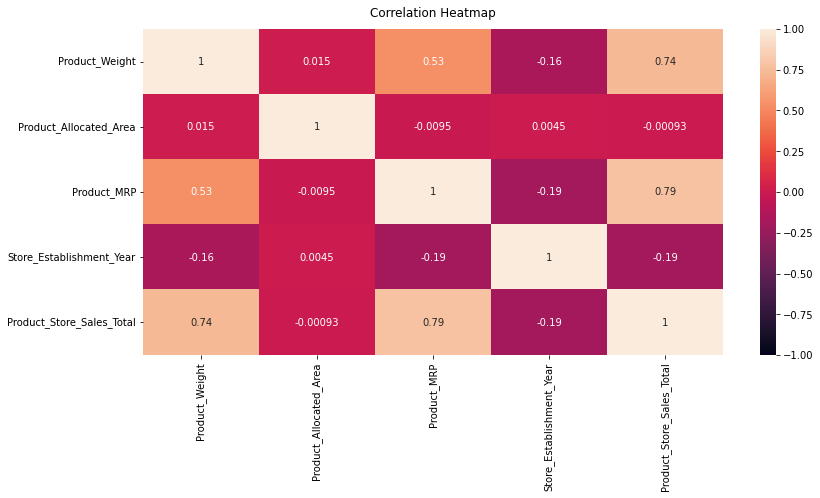

In [ ]:
plt.figure(figsize=(13, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

**Product MRP** and **Product Weight** are significantly positively co-related to **Product Sales**

Checking If there are any NULL values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


Checking Unique values of categorical columns

In [ ]:
df["Product_Sugar_Content"].unique()

array(['Low Sugar', 'Regular', 'No Sugar', 'reg'], dtype=object)

In [ ]:
df["Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
       'Health and Hygiene', 'Snack Foods', 'Meat', 'Household',
       'Hard Drinks', 'Fruits and Vegetables', 'Breads', 'Soft Drinks',
       'Breakfast', 'Others', 'Starchy Foods', 'Seafood'], dtype=object)

In [ ]:
df["Store_Id"].unique()

array(['OUT004', 'OUT003', 'OUT001', 'OUT002'], dtype=object)

In [ ]:
df["Store_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
df["Store_Location_City_Type"].unique()

array(['Tier 2', 'Tier 1', 'Tier 3'], dtype=object)

In [ ]:
df["Store_Type"].unique()

array(['Supermarket Type2', 'Departmental Store', 'Supermarket Type1',
       'Food Mart'], dtype=object)

# **Data Preprocessing**

### **One Hot Encoding**



Converting dtypes of objects into integer

In [ ]:
categorical_cols = ['Product_Sugar_Content', 'Product_Type', 'Store_Id','Store_Size','Store_Location_City_Type','Store_Type' ] 

df = pd.get_dummies(df, columns = categorical_cols)

### **Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

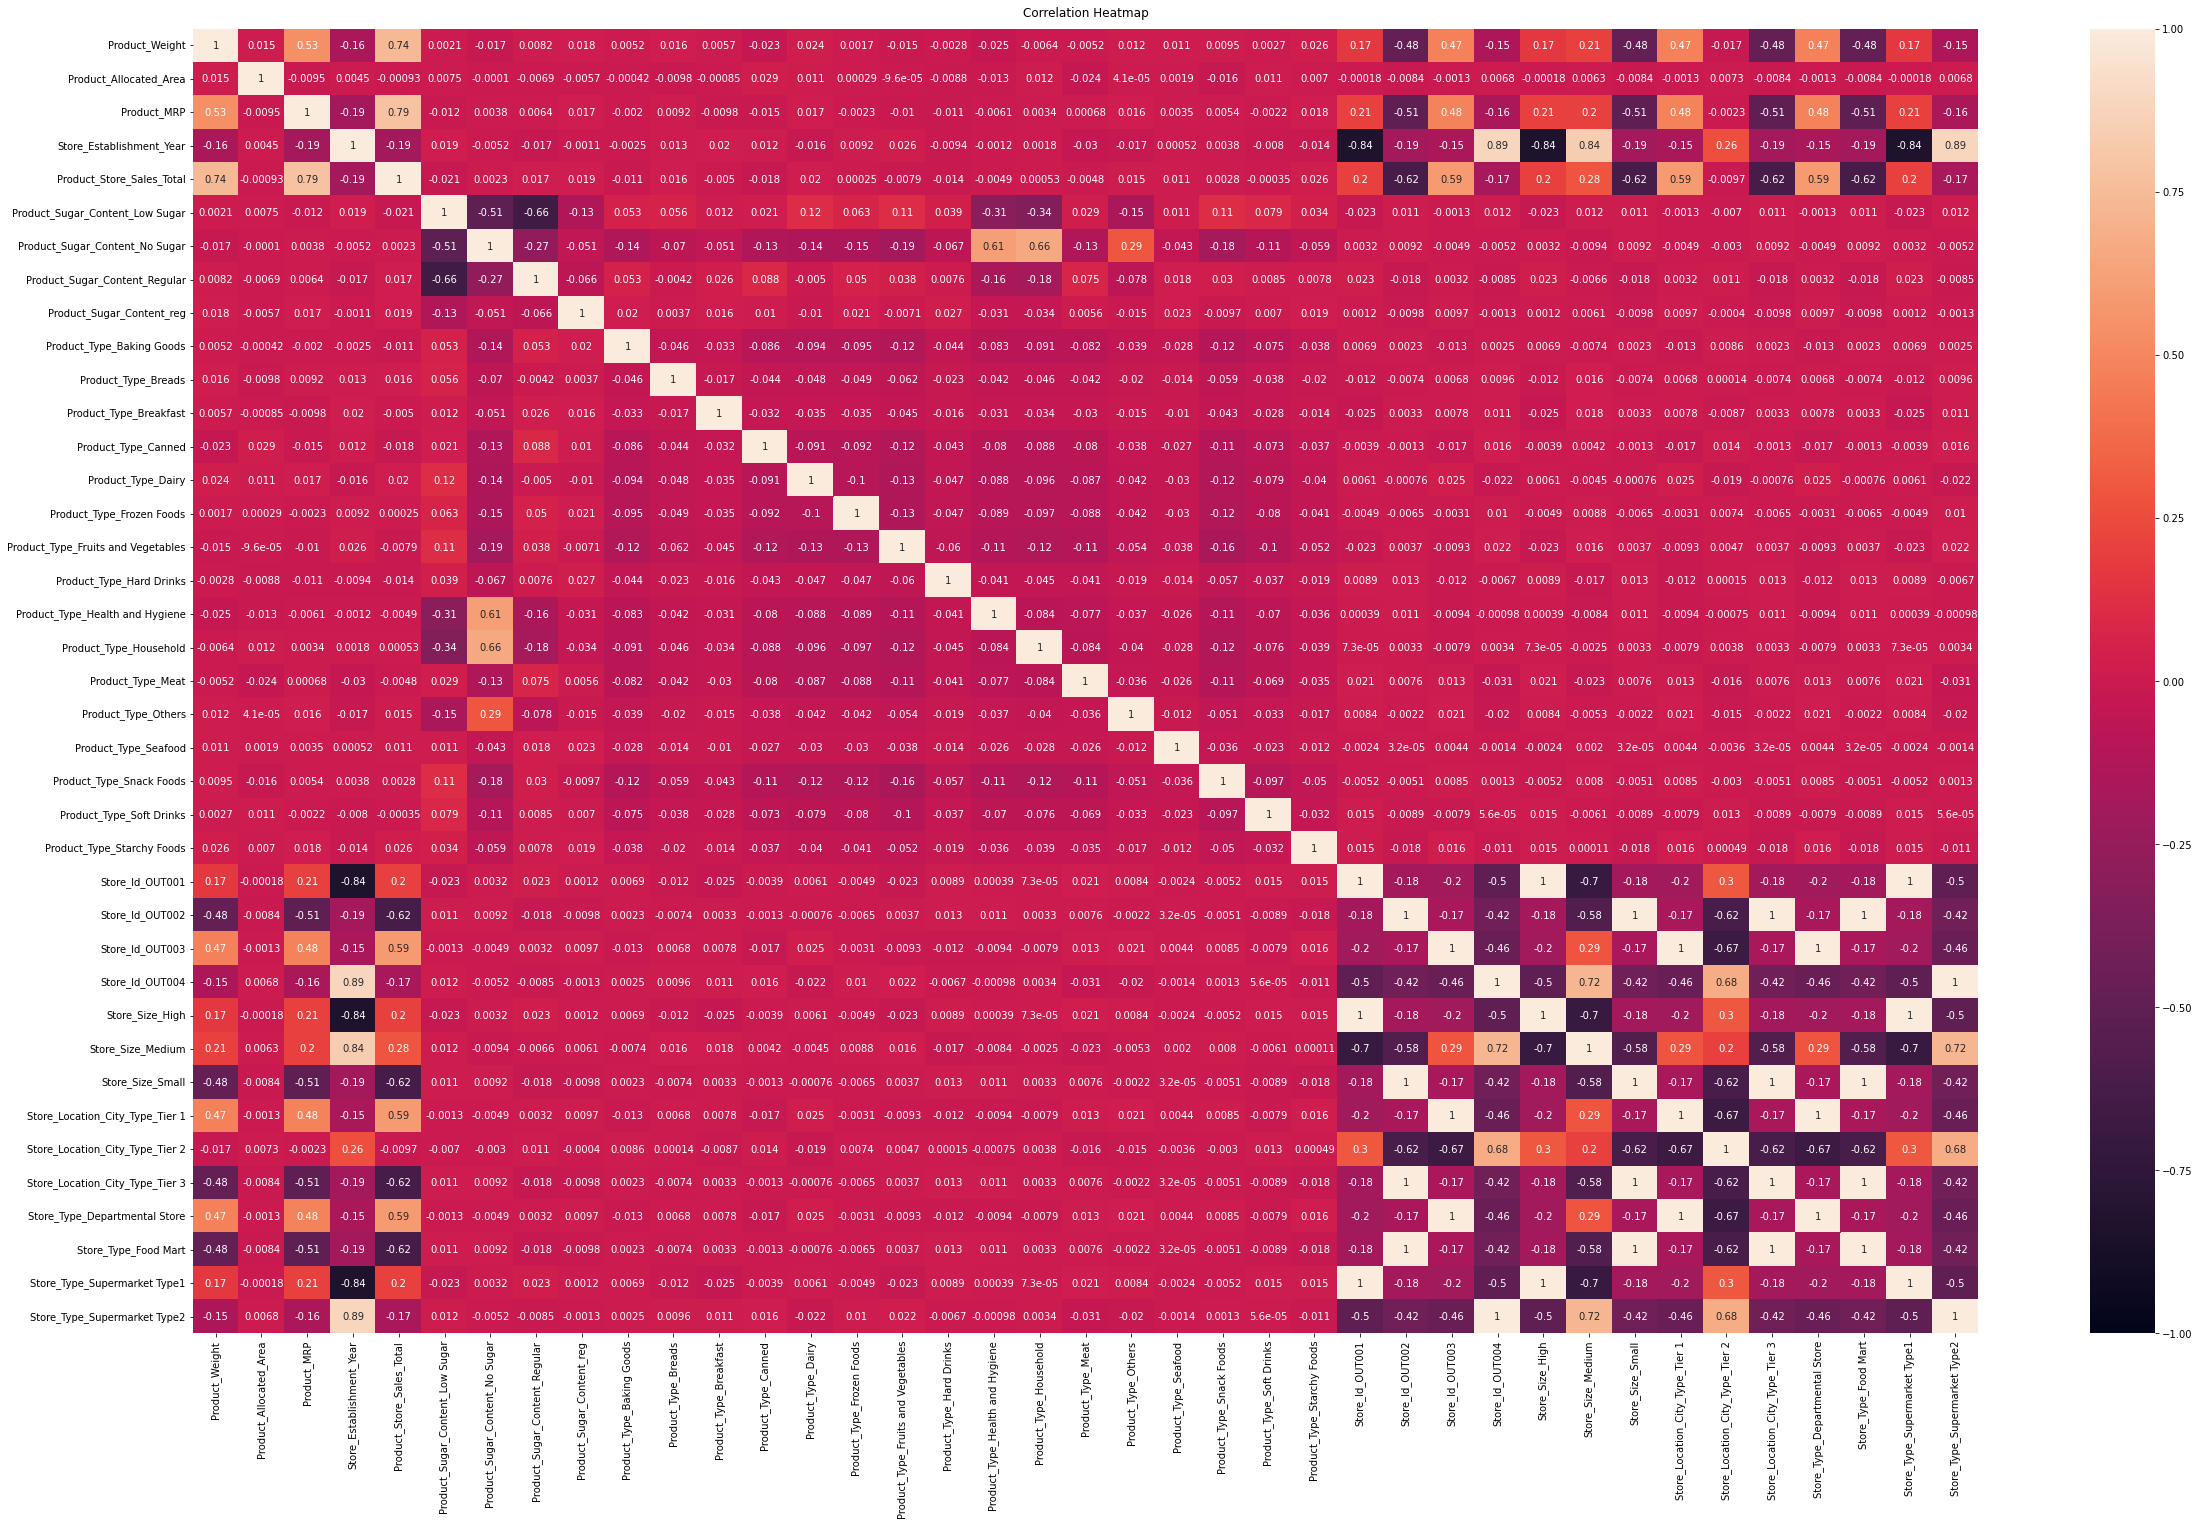

In [ ]:
plt.figure(figsize=(40, 24))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### **Outlier Detection**

In [ ]:
df.describe()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total,Product_Sugar_Content_Low Sugar,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Product_Sugar_Content_reg,Product_Type_Baking Goods,...,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 1,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Departmental Store,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,12.653792,0.068786,147.032539,2002.032751,3464.003640,0.557457,0.173342,0.256875,0.012325,0.081707,...,0.180988,0.687550,0.131462,0.153943,0.714595,0.131462,0.153943,0.131462,0.180988,0.533607
std,2.217320,0.048204,30.694110,8.388381,1065.630494,0.496716,0.378565,0.436935,0.110336,0.273934,...,0.385030,0.463519,0.337924,0.360914,0.451633,0.337924,0.360914,0.337924,0.385030,0.498898
min,4.000000,0.004000,31.000000,1987.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.150000,0.031000,126.160000,1998.000000,2761.715000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.660000,0.056000,146.740000,2009.000000,3452.340000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,14.180000,0.096000,167.585000,2009.000000,4145.165000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22.000000,0.298000,266.000000,2009.000000,8000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


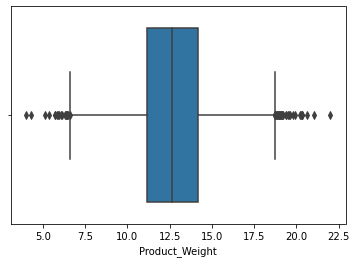

In [ ]:
sns.boxplot(df['Product_Weight'])

In [ ]:
print(len(np.where((df['Product_Weight'] < 7) | (df['Product_Weight'] > 19))[0]), "Outliers")

58 Outliers


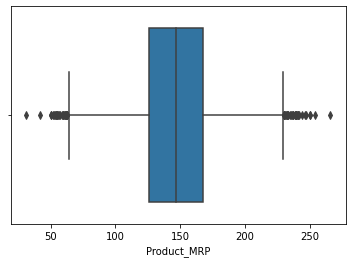

In [ ]:
sns.boxplot(df['Product_MRP'])

In [ ]:
print(len(np.where((df['Product_MRP'] < 65) | (df['Product_MRP'] > 235))[0]), "Outliers")

51 Outliers


The outlier-prone fields are only **Product Weight** and **Product MRP**

**Product Weight** only contains `58 Outliers` (**0.66%** of the total) - Negligible

**Product MRP** only contains `51 Outliers` (**0.58%** of the total) - Negligible


---


**~** We decided *not* to remove these outliers to avoid over-fitting and increase generalization of the model.

### **Dimensionality Reduction**

Dropping columns having low correlation with total sales revenue.

In [ ]:
df=df.drop("Product_Id",axis='columns')

In [ ]:
df=df.drop("Product_Allocated_Area",axis='columns')

# **Model building - Bagging**


### **Splitting Training and Test Sets**

In [ ]:
X=df.drop(['Product_Store_Sales_Total'], axis = 1)
y=df['Product_Store_Sales_Total']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

### **Bagging - Decision Tree**

Fitting bagging decision regressor to dataset by using base estimator as decsion tree.

In [ ]:
BaggingDecisionRegressor = BaggingRegressor(base_estimator= DecisionTreeRegressor()).fit(X_train, y_train)
y_pred=BaggingDecisionRegressor.predict(X_test)



**Performance Metrics**

In [ ]:
print("R2 Score is :",r2_score(y_test, y_pred))

0.9222350014814384

In [ ]:
print("Max error occured:",max_error(y_test, y_pred))

2576.4579999999996

Fitting bagging decision regressor to dataset by using base estimator as random forest.

### **Bagging - Random Forest**

In [ ]:
rf_regressor = BaggingRegressor(base_estimator= RandomForestRegressor()).fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
y_pred2=rf_regressor.predict(X_test)

**Performance Metrics**

In [ ]:
print("R2 Score is :", r2_score(y_test, y_pred2)

0.929728700333398

In [ ]:
print("Max error occured:" ,max_error(y_test, y_pred2))

2536.865140000001

### **Conclusion**

The r2 score of both estimators are approximately equal.

Bagging with decision trees has given r2 score of 92.2% (with default parameters)

Bagging with random forest has given r2 score of 92.9% (with default parameters)

# **Model Improvement - Bagging**

###Tuning Hyperparameters using grid search for **Bagging**

In [ ]:

params = {'base_estimator': [None,DecisionTreeRegressor(),RandomForestRegressor() ],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.968
Test R^2 Score : 0.930
Best R^2 Score Through Grid Search : 0.928
Best Parameters :  {'base_estimator': RandomForestRegressor(), 'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}


**Conclusion**

For bagging, the best parameters have improved training r2 score upto 96%.

But testing r2 score remains the same at 93.0%.

These best parameters include: `{'base_estimator': RandomForestRegressor(),'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}`

# **Model building - Boosting**

### **Adaboost**

Fitting adaboost model to the dataset

In [ ]:
adaboost_regressor = AdaBoostRegressor()
adaboost_regressor.fit(X_train, y_train)
y_pred3 = adaboost_regressor.predict(X_test)

**Performance Metrics**

In [ ]:
print("R2score is:",r2_score(y_test, y_pred3))
adaboost_regressor.score(X_test,y_test)

0.7813714399449557

In [ ]:
print("Max error occured:",max_error(y_test, y_pred3))

2199.412222948668

**Conclusion**

Adaboost has given r2 score of merely 78% (with default parameters)

### **Gradiant Boosting**

Fitting Gradient Boosting model to the dataset

In [ ]:
gbregressor=GradientBoostingRegressor()
gbregressor.fit(X_train, y_train)
y_pred4=gbregressor.predict(X_test)

**Performance Metrics**

In [ ]:
print("R2score is:", gbregressor.score(X_test,y_test)

0.9170138252940477

In [ ]:
print ("Max error occured:",max_error(y_test, y_pred4)

2361.9828777198145

**Conclusion**

Gradient Boosting has given r2 score of 91.7% (with default parameters)

# **Model Improvement - Boosting**

###Finding best Hyperparameters using randomized search for **Ada Boost**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

adaboost_regressor = AdaBoostRegressor()

params = {
    'base_estimator': list(map(lambda depth: DecisionTreeRegressor(max_depth=depth), [x+1 for x in range(0, 10, 2)])),
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}
adaboost_regressor_randomized=RandomizedSearchCV(estimator=adaboost_regressor,param_distributions=params,scoring='neg_mean_squared_error',n_jobs=1,cv=9)
adaboost_regressor_randomized.fit(X_train,y_train)

RandomizedSearchCV(cv=9, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'base_estimator': [DecisionTreeRegressor(max_depth=1),
                                                           DecisionTreeRegressor(max_depth=3),
                                                           DecisionTreeRegressor(max_depth=5),
                                                           DecisionTreeRegressor(max_depth=7),
                                                           DecisionTreeRegressor(max_depth=9)],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'n_estimators': [10, 50, 100, 500]},
                   scoring='neg_mean_squared_error')

R2 score after using best hyperparameters for Adaboost

In [ ]:
print(adaboost_regressor_randomized.best_params_)
print('Train R^2 Score : %.3f'%adaboost_regressor_randomized.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%adaboost_regressor_randomized.best_estimator_.score(X_test, y_test))

{'n_estimators': 100, 'learning_rate': 0.001, 'base_estimator': DecisionTreeRegressor(max_depth=9)}
Train R^2 Score : 0.950
Test R^2 Score : 0.929


**Conlusion**

R2 score of adaboost has been improved to 93% (with best parameters)

These best parameters include: `{'n_estimators': 100, 'learning_rate': 0.001, 'base_estimator': DecisionTreeRegressor(max_depth=9)}`

###Finding best Hyperparameters using randomized search for **Gradient Boosting**

In [ ]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
GBR_randomized=RandomizedSearchCV(estimator=GBR,param_distributions=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=9)
GBR_randomized.fit(X_train,y_train)
GBR_randomized.best_params_

{'subsample': 0.75,
 'random_state': 1,
 'n_estimators': 500,
 'max_depth': 4,
 'learning_rate': 0.01}

In [ ]:
print('Train R^2 Score : %.3f'%GBR_randomized.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%GBR_randomized.best_estimator_.score(X_test, y_test)) 

Train R^2 Score : 0.934
Test R^2 Score : 0.924


**Conlusion**

R2 score of gradient boosting has been slightly improved to 92.4% (with best parameters)

These best parameters include: `{'n_estimators': 100, 'learning_rate': 0.001, 'base_estimator': DecisionTreeRegressor(max_depth=9)}`

# **Data Insights**

In [ ]:
df.head()

,Product_Weight,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total,Product_Sugar_Content_Low Sugar,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Product_Sugar_Content_reg,Product_Type_Baking Goods,Product_Type_Breads,...,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 1,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Departmental Store,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2
0,12.66,117.08,2009,2842.40,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,16.54,171.43,1999,4830.02,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,14.28,162.08,1987,4130.16,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,12.10,186.31,1987,4132.18,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,9.57,123.67,1998,2279.36,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


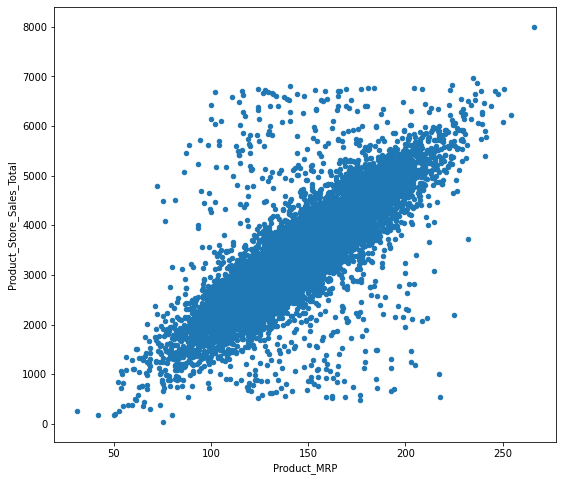

In [ ]:
df.plot(x="Product_MRP", y='Product_Store_Sales_Total', kind="scatter", figsize=(9, 8))
plt.show()


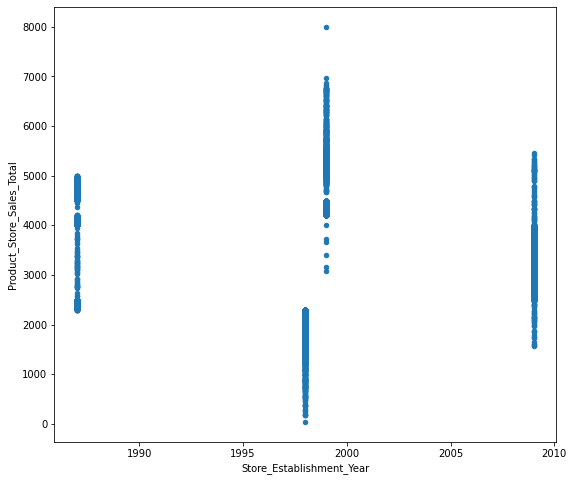

In [ ]:
df.plot(x="Store_Establishment_Year", y='Product_Store_Sales_Total', kind="scatter", figsize=(9, 8))
plt.show()


These graph represents that the store established in 1999 has the most sales. **(Departmental, Tier 1 ~ High Standard of Living, Medium Sized, 003)**

Stores **(001 and 004)** established in **1987 and 2009** share the almost same patterns of sales.
Both are (Supermarket, Tier 2) except **(004 is medium sized)** while **(001 is large sized)**

While small store **(Tier 3 - Foodmart)** revenue the least.

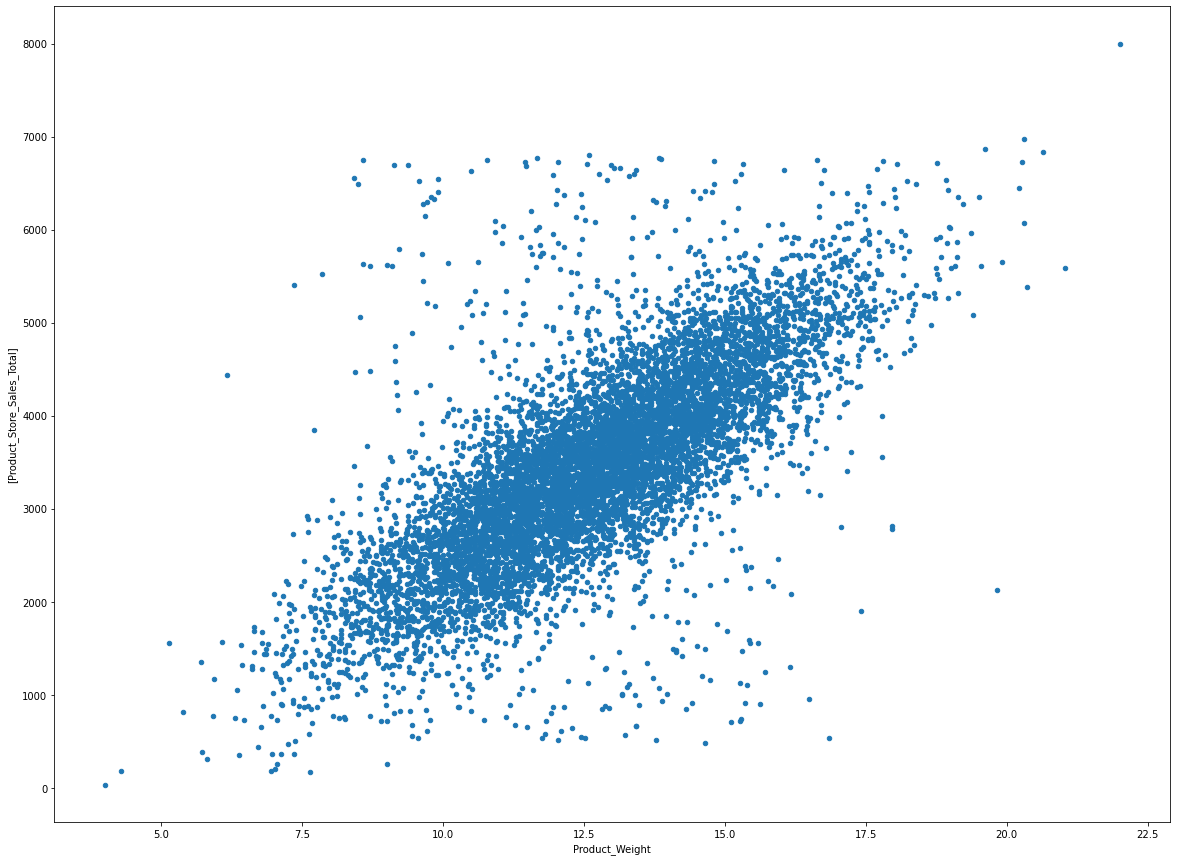

In [ ]:
df.plot(x="Product_Weight", y=["Product_Store_Sales_Total"], kind="scatter", figsize=(20, 15))
plt.show()

**Calculating Products and Total Revenue of Individual Stores**

In [ ]:
store1_rows = np.where((df['Store_Id'] == "OUT001"))[0]
store2_rows = np.where((df['Store_Id'] == "OUT002"))[0]
store3_rows = np.where((df['Store_Id'] == "OUT003"))[0]
store4_rows = np.where((df['Store_Id'] == "OUT004"))[0]

In [ ]:
print("Store 1 has", len(store1_rows), "Products")
print("Store 2 has", len(store2_rows), "Products")
print("Store 3 has", len(store3_rows), "Products")
print("Store 4 has", len(store4_rows), "Products")

Store 1 has 1586 Products
Store 2 has 1152 Products
Store 3 has 1349 Products
Store 4 has 4676 Products


In [ ]:
store1_revenue = df.iloc[store1_rows]['Product_Store_Sales_Total'].sum()
store2_revenue = df.iloc[store2_rows]['Product_Store_Sales_Total'].sum()
store3_revenue = df.iloc[store3_rows]['Product_Store_Sales_Total'].sum()
store4_revenue = df.iloc[store4_rows]['Product_Store_Sales_Total'].sum()

print("Store 1 generated", store1_revenue, "revenue")
print("Store 2 generated", store2_revenue, "revenue")
print("Store 3 generated", store3_revenue, "revenue")
print("Store 4 generated", store4_revenue, "revenue")

Store 1 generated 6223113.18 revenue
Store 2 generated 2030909.72 revenue
Store 3 generated 6673457.57 revenue
Store 4 generated 15427583.43 revenue


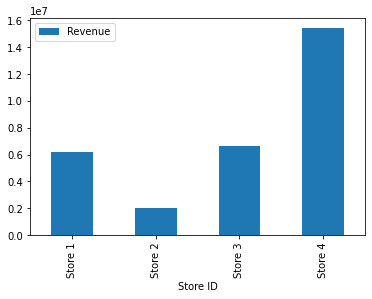

In [ ]:
revenue_data = {'Store ID': ["Store 1", "Store 2", "Store 3", "Store 4"], 'Revenue': [store1_revenue, store2_revenue, store3_revenue, store4_revenue]}
revenue_df = pd.DataFrame(revenue_data)
revenue_df.plot.bar(x='Store ID', y='Revenue')
plt.show()

# **Final Takeaways**


**~ Recommendation 1:** Building large stores are not giving any advantage over medium stores i.e., **store 004** outperforms **store 001** although both are **Supermarkets** located in **Tier 2 Societies**

**~ Recommendation 2:** Stores having **more variety of products** (even if they are not big) are likely to be more profitable i.e. **store 004 has 4676 products** where its **competitor store 001 only has 1586 products**

**~ Recommendation 3:** Stores which are **recent** are more likely to perform better (Comparing store 004 with 001)

**~ Recommendation 4:** Business expansion should be in **Tier 1 or Tier 2 Societies** as Store 002 (located in **Tier 3**) has not performed well.